In [1]:
from google.colab.patches import cv2_imshow
import imutils
from imutils import contours
import numpy as np
import cv2
cv2.__version__

'4.8.0'

In [2]:
# klucz odpowiedzi
ANSWER_KEY = {0: 1, 1: 3, 2: 0, 3: 2, 4: 1, 5: 3, 6: 4, 7: 1, 8: 3, 9: 0}

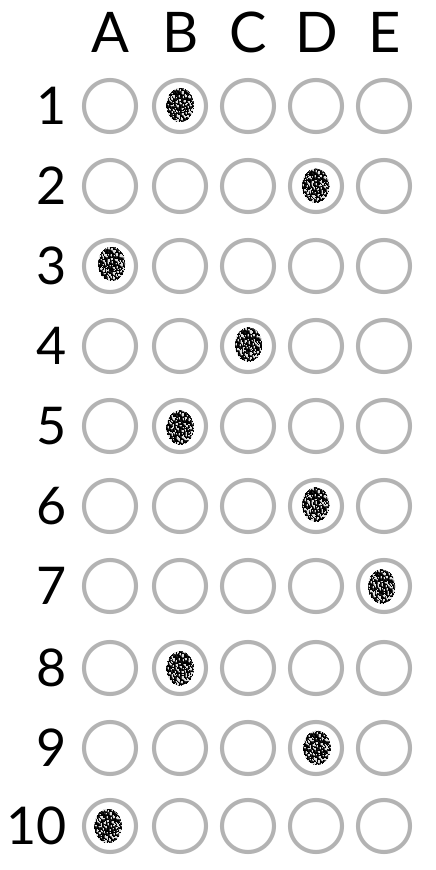

In [3]:
image = cv2.imread('key.png')
cv2_imshow(image)

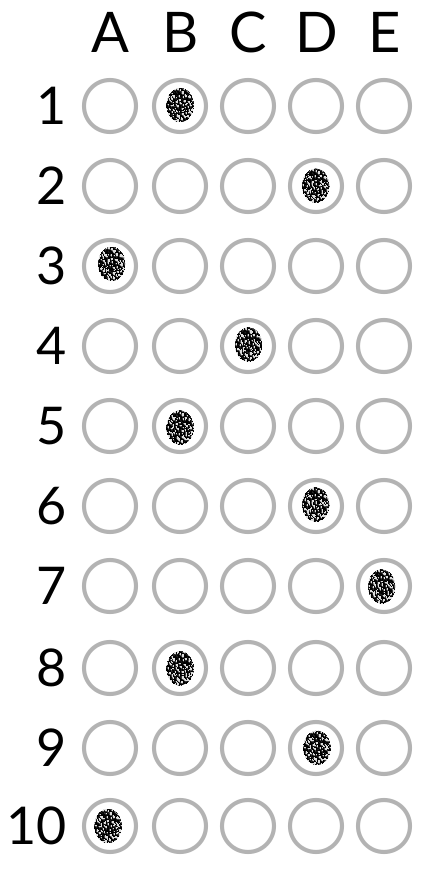

In [4]:
gray = cv2.cvtColor(src=image, code=cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

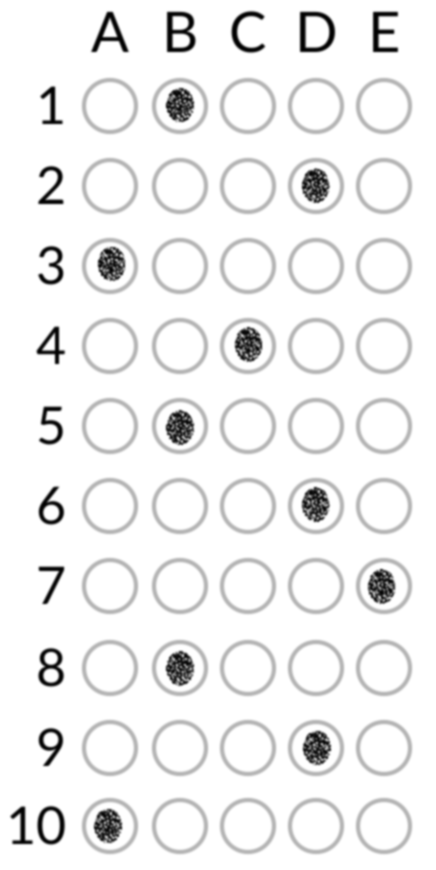

In [5]:
blurred = cv2.GaussianBlur(src = gray, ksize=(5,5), sigmaX=0)
cv2_imshow(blurred)

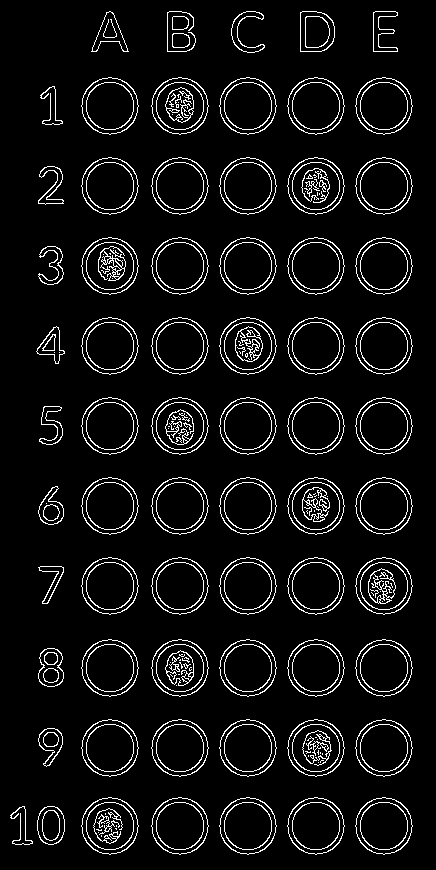

In [6]:
thresh = cv2.Canny(image=blurred, threshold1=70, threshold2=70)
cv2_imshow(thresh)

In [7]:
cnts = cv2.findContours(image=thresh.copy(), mode=cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
len(cnts)

68

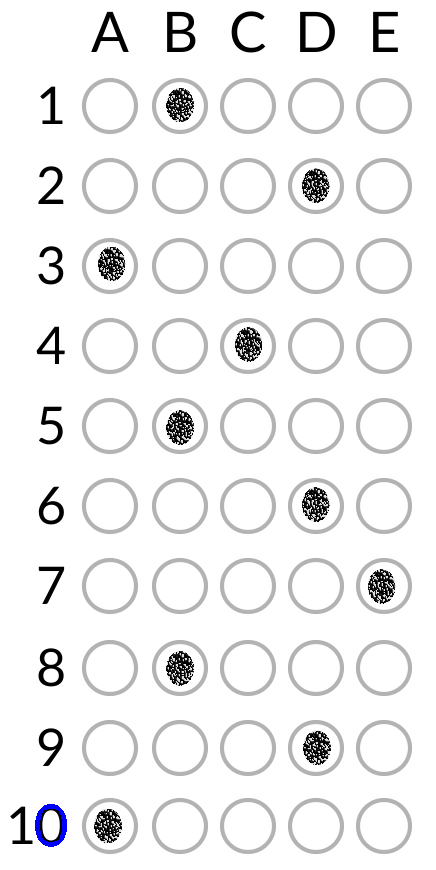

In [10]:
cnt1 = cv2.drawContours(image = image.copy(), contours=[cnts[0]], contourIdx=-1, color=(255,0,0), thickness=3)
cv2_imshow(cnt1)

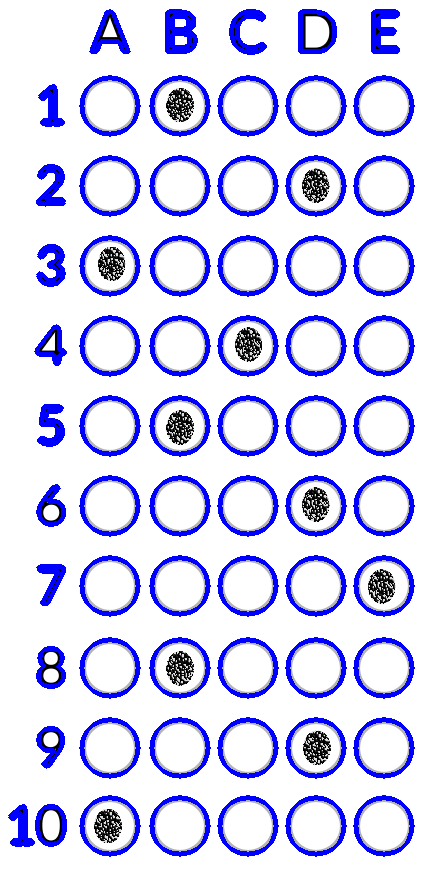

In [12]:
cnt_img = image.copy()
for cont in cnts:
  cnt_img = cv2.drawContours(image=cnt_img, contours=[cont], contourIdx=-1, color=(255,0,0), thickness=3)
cv2_imshow(cnt_img)

Liczba pól z odpowiedziami: 50


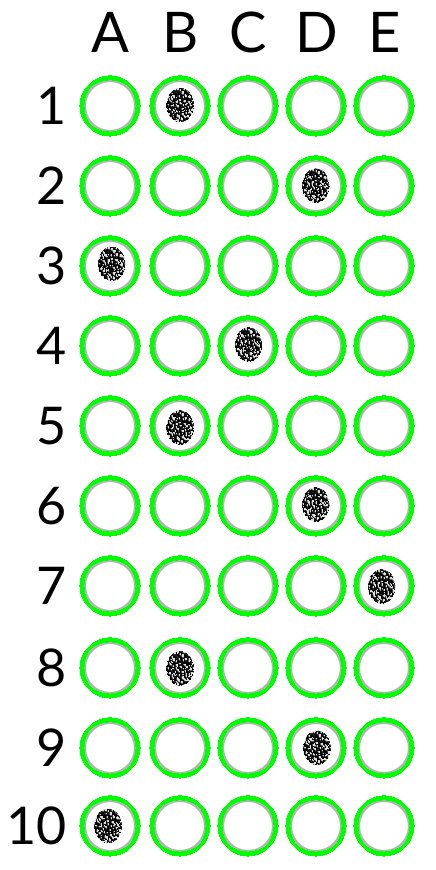

In [13]:
question_contours = []

for contour in cnts:
    # WYDOBYWA Z KAZDEGO KONTURU OTACZAJACY PROSTOKAT xywh TO JEGO WIERZCHOLKI
    (x, y, w, h) = cv2.boundingRect(contour)
    # SZEROKOSC DZIELIMY PRZEZ WYSOKOSC
    ar = w / float(h)
    # JESLI SZER I WYS > 50 PIX ORAZ AR JEST W PRZYBLIZENIU JEDEN CZYLI PRZYPOMINA KWADRAT DODAJEMY KONTUR DO LISTY
    if w >= 50 and h >= 50 and ar > 0.9 and ar < 1.1:
        question_contours.append(contour)

print(f'Liczba pól z odpowiedziami: {len(question_contours)}')

cnt_img = image.copy()
for contour in question_contours:
    cv2.drawContours(cnt_img, [contour], contourIdx=-1, color=(0, 255, 0), thickness=3)
cv2_imshow(cnt_img)

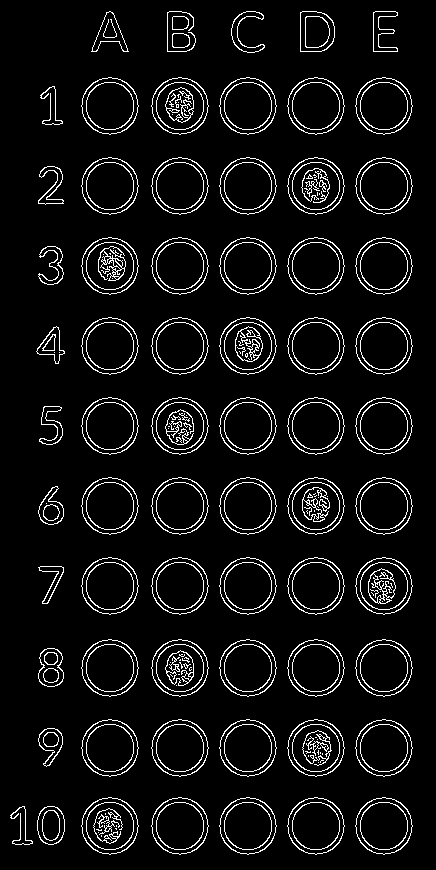

In [14]:
cv2_imshow(thresh)

In [15]:
# sortowanie kontur od góry do dołu
question_top_bottom = imutils.contours.sort_contours(question_contours, method='top-to-bottom')[0]

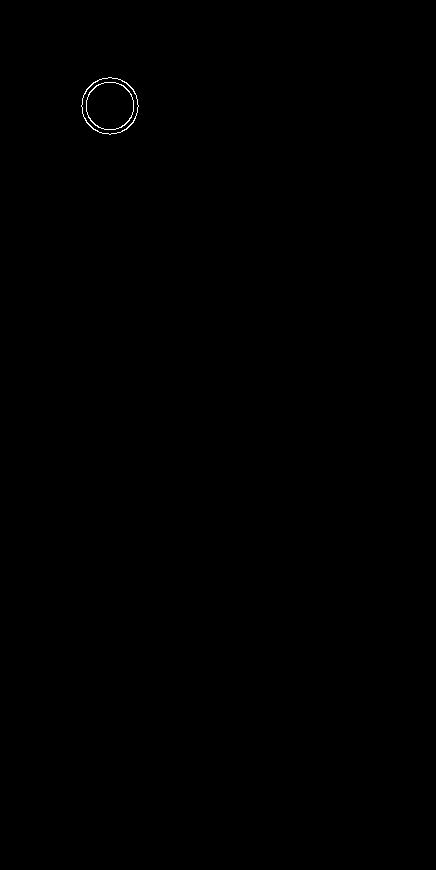

(375, 0)
1


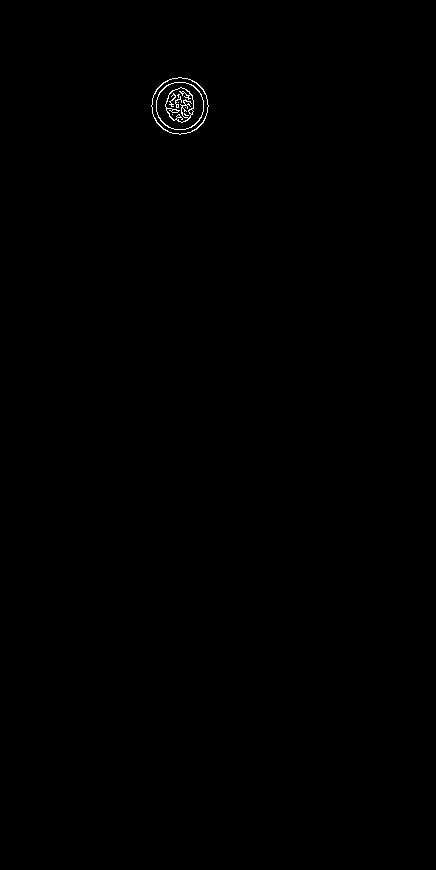

(695, 1)
1


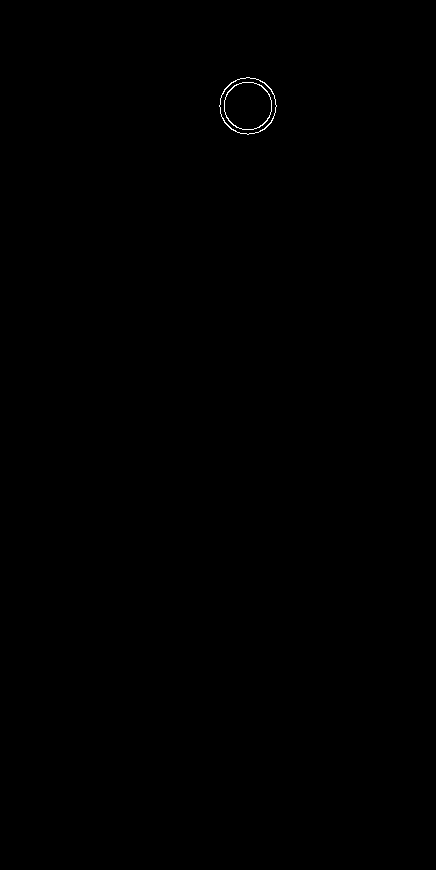

(695, 1)
1


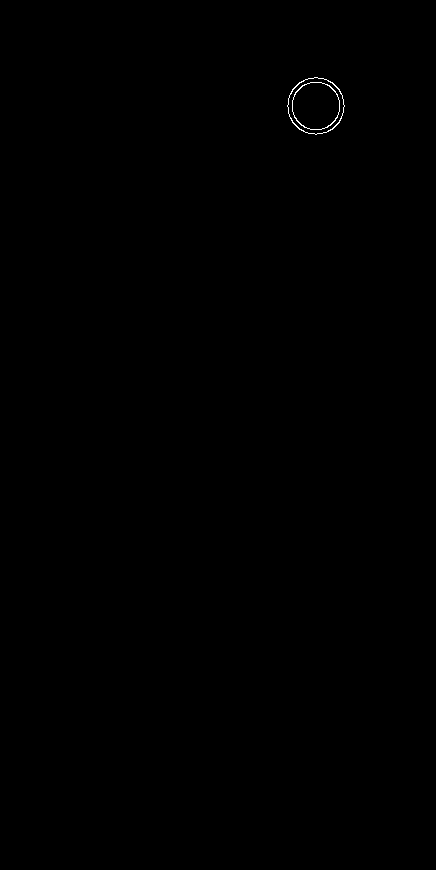

(695, 1)
1


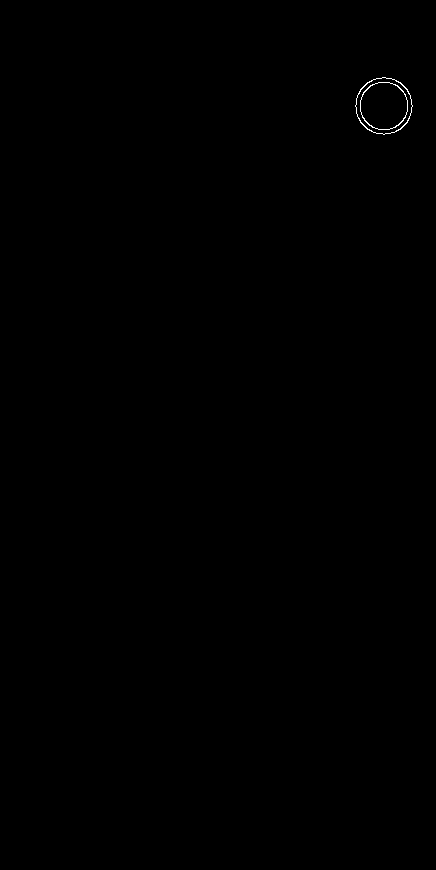

(695, 1)
1


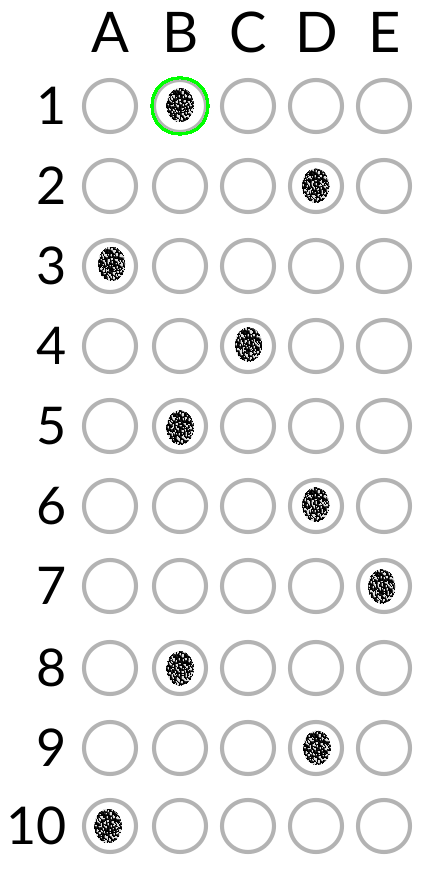

In [16]:
# wydobycie pierwszych 5 kontur i sortowanie od lewej do prawej
first_5 = question_top_bottom[:5]
first_5_left_right = imutils.contours.sort_contours(first_5, method='left-to-right')[0]

img = image.copy()

marked = None

for idx, contour in enumerate(first_5_left_right):
    # tworzymy maskę z samych zer
    mask = np.zeros(thresh.shape, dtype='uint8')

    # rysujemy kontur na masce
    cv2.drawContours(mask, [contour], -1, 255, -1)

    # przeprowadzamy operację bitwise_and na obrazie thresh
    mask = cv2.bitwise_and(thresh, thresh, mask=mask)
    cv2_imshow(mask)

    # zliczamy liczbę pikseli niezerowych
    total = cv2.countNonZero(mask)


    if marked is None or total > marked[0]:
        marked = (total, idx)
    print(marked)

    # kolor czerwony
    color = (0, 0, 255)

    key = ANSWER_KEY[0]
    print(key)

    if key == marked[1]:
        # zaznacz na kolor zielony
        color = (0, 255, 0)

cv2.drawContours(img, [first_5_left_right[key]], -1, color, 2)
cv2_imshow(img)

Rozwiązanie dla wszystkich pytań

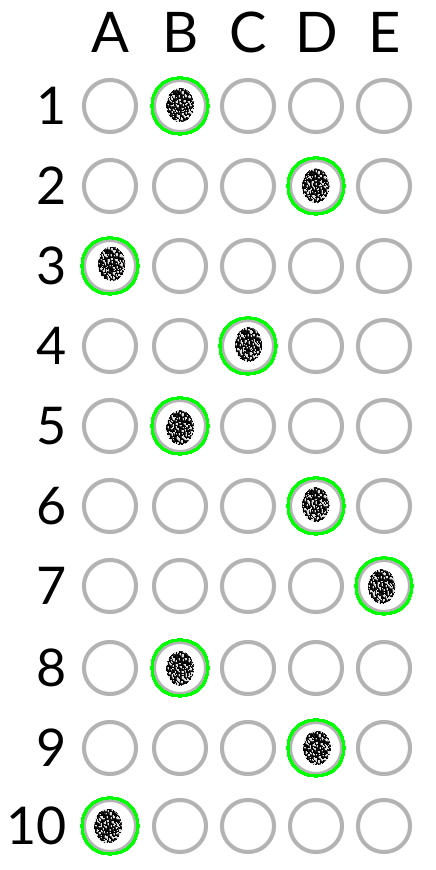

In [18]:

img = image.copy()

correct = 0

# sortowanie kontur od góry do dołu
question_top_bottom = imutils.contours.sort_contours(question_contours, method='top-to-bottom')[0]

for question, idx in enumerate(range(0, len(question_contours), 5)):

    # wydobycie pierwszych 5 kontur i sortowanie od lewej do prawej
    fields = question_top_bottom[idx:idx + 5]
    fields = imutils.contours.sort_contours(fields, method='left-to-right')[0]

    marked = None

    for cnt_idx, contour in enumerate(fields):
        # tworzymy maskę z samych zer
        mask = np.zeros(thresh.shape, dtype='uint8')

        # rysujemy kontur na masce
        cv2.drawContours(mask, [contour], -1, 255, -1)

        # przeprowadzamy operację bitwise_and na obrazie thresh
        mask = cv2.bitwise_and(thresh, thresh, mask=mask)

        # zliczamy liczbę pikseli niezerowych
        total = cv2.countNonZero(mask)


        if marked is None or total > marked[0]:
            marked = (total, cnt_idx)

    # kolor czerwony
    color = (0, 0, 255)

    key = ANSWER_KEY[question]

    if key == marked[1]:
        # zaznacz na kolor zielony
        color = (0, 255, 0)
        correct += 1

    cv2.drawContours(img, [fields[key]], -1, color, 2)

cv2_imshow(img)

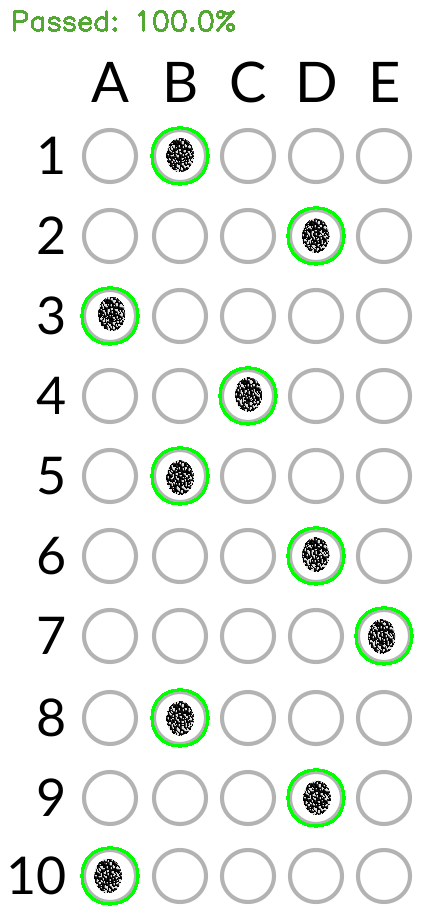

In [19]:

# dodanie górnego obramowania
checked = cv2.copyMakeBorder(
    src=img,
    top=50,
    bottom=0,
    left=0,
    right=0,
    borderType=cv2.BORDER_CONSTANT,
    value=(255, 255, 255)
)

score = (correct / 10)

color = (50, 168, 82) if score >= 0.6 else (71, 7, 219)
text = 'Passed' if score >= 0.6 else 'Failed'

cv2.putText(img=checked, text=f'{text}: {score * 100}%', org=(10, 30), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.9, color=color, thickness=2)
cv2_imshow(checked)

In [21]:
# ZAPISANIE PLIKU Z WYNIKIEM
cv2.imwrite(filename='checked.png', img=checked)

NameError: name 'cv2_imwrite' is not defined